
#  SyriaTel Customer  Churn Analysis

Analysist: Stephanie Mbithe 




**Content**

Business Understanding

Data Understanding

Data Preparation

Modeling

Evaluation

# 1.  Business Understanding

SyriaTel is a telecommunications company that is interested in reducing the financial losses caused by customers who churn, i.e., customers who terminate their business relationship with the company. To address this problem, we will build a binary classifier to predict whether a customer will soon churn or not. By identifying predictable patterns that are indicative of customer churn, SyriaTel can take proactive measures to retain customers and minimize revenue loss.

The dataset provided for this analysis contains relevant customer information, usage patterns, and churn status. By exploring and understanding this data, we aim to uncover any underlying patterns or relationships that can help in predicting customer churn.

#### The objectives of this analysis are as follows:

* Identify the key factors or features that contribute to customer churn in SyriaTel.
* Build a classification model that can accurately predict whether a customer is likely to churn.
* Provide insights and recommendations to SyriaTel based on the analysis to improve customer retention strategies.
* By achieving these objectives, SyriaTel can take proactive actions such as targeted marketing campaigns, personalized offers, or improved customer service to retain at-risk customers and reduce churn.

In the following sections, we will explore the dataset, analyze the distribution of churned and non-churned customers, investigate potential correlations between features and churn, and identify any predictable patterns that can aid in predicting customer churn.

# 2. Data Understanding

### Summary of Features in the Datset

**state**: the state the customer lives in

**account length**: the number of days the customer has had an account

**area code**: the area code of the customer

**phone number**: the phone number of the customer

**international plan**: true if the customer has the international plan, otherwise false

**voice mail plan**: true if the customer has the voice mail plan, otherwise false

**number vmail messages**: the number of voicemails the customer has sent

**total day minutes**: total number of minutes the customer has been in calls during the day

**total day calls**: total number of calls the user has done during the day

**total day charge**: total amount of money the customer was charged by the Telecom company for calls during the day

**total eve minutes**: total number of minutes the customer has been in calls during the evening

**total eve calls**: total number of calls the customer has done during the evening

**total eve charge**: total amount of money the customer was charged by the Telecom company for calls during the evening

**total night minutes**: total number of minutes the customer has been in calls during the night

**total night calls**: total number of calls the customer has done during the night

**total night charge**: total amount of money the customer was charged by the Telecom company for calls during the night

**total intl minutes**: total number of minutes the user has been in international calls

**total intl calls**: total number of international calls the customer has done

**total intl charge**: total amount of money the customer was charged by the Telecom company for international calls

**customer service calls**: number of calls the customer has made to customer service

**churn**: true if the customer terminated their contract, otherwise false

#### Dependent Variable
The dependent variable in this study will be churn.

Churn shows whether a customer has ended their agreement with SyriaTel.

True denotes that they have terminated, while false denotes that they have not and still have an active account.


### Import Libraries


In [1]:
# importing libraries for data handling
import numpy as np
import pandas as pd
# importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno confirm how to import it and its purpose
import folium
import warnings

# importing libraries for modeling
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import metrics as metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

# Algorithms for supervised learning methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Modeling
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV #splitting the dataset into test-train
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report # performance metrics
from sklearn.preprocessing import MinMaxScaler # to scale the numeric features
from imblearn.over_sampling import SMOTE #SMOTE technique to deal with unbalanced data problem

# Feature Selection, XAI, Feature Importance
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectFromModel

# importing libraries for statistics
import scipy.stats as stats

# importing libraries for styling
plt.style.use('seaborn')
sns.set_style('whitegrid')

warnings.filterwarnings('ignore')


In [2]:
# Read data from csv file & create dataframe. Checking the first 5 rows.
df=pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [3]:
# Check shape of dataframe 
df.shape

(3333, 21)

In [4]:
# statistical description of fetures in the dataframe
df.describe(include="all") 

state  account length    area code phone number international plan  \
count   3333     3333.000000  3333.000000         3333               3333   
unique    51             NaN          NaN         3333                  2   
top       WV             NaN          NaN     382-4657                 no   
freq     106             NaN          NaN            1               3010   
mean     NaN      101.064806   437.182418          NaN                NaN   
std      NaN       39.822106    42.371290          NaN                NaN   
min      NaN        1.000000   408.000000          NaN                NaN   
25%      NaN       74.000000   408.000000          NaN                NaN   
50%      NaN      101.000000   415.000000          NaN                NaN   
75%      NaN      127.000000   510.000000          NaN                NaN   
max      NaN      243.000000   510.000000          NaN                NaN   

       voice mail plan  number vmail messages  total day minutes  \
count             3333            3333.000000        3333.000000   
unique               2                    NaN                NaN   
top                 no                    NaN                NaN   
freq              2411                    NaN                NaN   
mean               NaN               8.099010         179.775098   
std                NaN              13.688365          54.467389   
min                NaN               0.000000           0.000000   
25%                NaN               0.000000         143.700000   
50%                NaN               0.000000         179.400000   
75%                NaN              20.000000         216.400000   
max                NaN              51.000000         350.800000   

        total day calls  total day charge  ...  total eve calls  \
count       3333.000000       3333.000000  ...      3333.000000   
unique              NaN               NaN  ...              NaN   
top                 NaN               NaN  ...              NaN   
freq                NaN               NaN  ...              NaN   
mean         100.435644         30.562307  ...       100.114311   
std           20.069084          9.259435  ...        19.922625   
min            0.000000          0.000000  ...         0.000000   
25%           87.000000         24.430000  ...        87.000000   
50%          101.000000         30.500000  ...       100.000000   
75%          114.000000         36.790000  ...       114.000000   
max          165.000000         59.640000  ...       170.000000   

        total eve charge  total night minutes  total night calls  \
count        3333.000000          3333.000000        3333.000000   
unique               NaN                  NaN                NaN   
top                  NaN                  NaN                NaN   
freq                 NaN                  NaN                NaN   
mean           17.083540           200.872037         100.107711   
std             4.310668            50.573847          19.568609   
min             0.000000            23.200000          33.000000   
25%            14.160000           167.000000          87.000000   
50%            17.120000           201.200000         100.000000   
75%            20.000000           235.300000         113.000000   
max            30.910000           395.000000         175.000000   

        total night charge  total intl minutes  total intl calls  \
count          3333.000000         3333.000000       3333.000000   
unique                 NaN                 NaN               NaN   
top                    NaN                 NaN               NaN   
freq                   NaN                 NaN               NaN   
mean              9.039325           10.237294          4.479448   
std               2.275873            2.791840          2.461214   
min               1.040000            0.000000          0.000000   
25%               7.520000            8.500000          3.000000   
50%               9.050000     

In [5]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

# 3. Data Preparation

This section prepares the data for EDA and modeling. The dataset will be checked for:

duplicated rows
missing values
irrelevant columns as they may not add to the analysis

In [6]:
# Look at the types of data and checking for any missing values
df.info()
display('-'*100)
display(df.isnull().sum()/len(df)*100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

'----------------------------------------------------------------------------------------------------'

state                     0.0
account length            0.0
area code                 0.0
phone number              0.0
international plan        0.0
voice mail plan           0.0
number vmail messages     0.0
total day minutes         0.0
total day calls           0.0
total day charge          0.0
total eve minutes         0.0
total eve calls           0.0
total eve charge          0.0
total night minutes       0.0
total night calls         0.0
total night charge        0.0
total intl minutes        0.0
total intl calls          0.0
total intl charge         0.0
customer service calls    0.0
churn                     0.0
dtype: float64

As we can see there are no missing values. Also the area code column is identified as an interger we have to convert to object.

In [7]:
# convert area code column to object
df['area code'] = df['area code'].astype(str)


In [8]:
# Check for duplicated rows, no duplicated rows to deal with.
df.duplicated().sum() # None duplicated values

0

In [9]:
# Remove customer number feature it is contact information on the client and adds no value to the analysis
# Recheck dataframe
df.drop(['phone number'],axis=1,inplace=True)
df.head()

state  account length area code international plan voice mail plan  \
0    KS             128       415                 no             yes   
1    OH             107       415                 no             yes   
2    NJ             137       415                 no              no   
3    OH              84       408                yes              no   
4    OK              75       415                yes              no   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [10]:
# Replace churn column features to be 0s and 1s instead of booleans
df.replace(False, 0, inplace=True)
df.replace(True, 1, inplace=True)

In [11]:
# check the last 5 rows
df.tail()

state  account length area code international plan voice mail plan  \
3328    AZ             192       415                 no             yes   
3329    WV              68       415                 no              no   
3330    RI              28       510                 no              no   
3331    CT             184       510                yes              no   
3332    TN              74       415                 no             yes   

      number vmail messages  total day minutes  total day calls  \
3328                     36              156.2               77   
3329                      0              231.1               57   
3330                      0              180.8              109   
3331                      0              213.8              105   
3332                     25              234.4              113   

      total day charge  total eve minutes  total eve calls  total eve charge  \
3328             26.55              215.5              126             18.32   
3329             39.29              153.4               55             13.04   
3330             30.74              288.8               58             24.55   
3331             36.35              159.6               84             13.57   
3332             39.85              265.9               82             22.60   

      total night minutes  total night calls  total night charge  \
3328                279.1                 83               12.56   
3329                191.3                123                8.61   
3330                191.9                 91                8.64   
3331                139.2                137                6.26   
3332                241.4                 77               10.86   

      total intl minutes  total intl calls  total intl charge  \
3328                 9.9                 6               2.67   
3329                 9.6                 4               2.59   
3330                14.1                 6               3.81   
3331                 5.0                10               1.35   
3332                13.7                 4               3.70   

      customer service calls  churn  
3328                       2      0  
3329                       3      0  
3330                       2      0  
3331                       2      0  
3332                       0      0

In [12]:
# Create numeric & categorical lists
numeric_cols = ['account length','number vmail messages','total day minutes','total day calls','total day charge',
                'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls',
                'total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']
categoric_cols = ['state','area code','international plan','voice mail plan']




## Explanatory Data Analysis (EDA)

In [13]:
# Check the number of unique values in all columns to determine feature type
df.nunique()

state                       51
account length             212
area code                    3
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

#### Feature Types

Continuous features are numeric values with an infinite number of possible values

Categorical features are values that have a finite number of categories/groups

This step seperates all of the useful features in the dataset so that they can be analyzed accordingly ahead of modeling.


#### Continuous Features:

account length

number vmail messages

total day minutes

total day calls

total day charge

total eve minutes

total eve calls

total eve charge

total night minutes

total night calls

total night charge

total intl minutes

total intl charge

customer service calls

#### Categorical Features:

state

area code

international plan

voice mail plan


Analysis on 'churn' Feature

Churn will be used as the dependent variable in this analysis as we classified earlier.
Churn indicates if a customer has terminated their contract with SyriaTel. True indicates they have terminated and false indicates they have not and have and have an existing account.

0    2850
1     483
Name: churn, dtype: int64


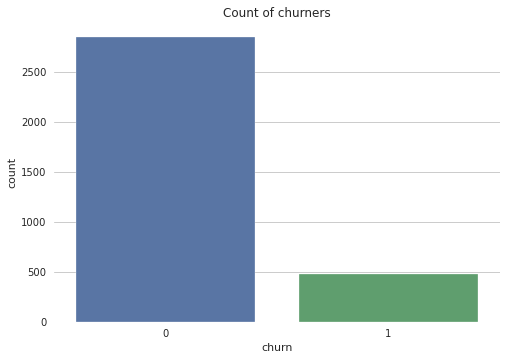

In [14]:
# Countplot of churn feature
print(df.churn.value_counts())
sns.countplot(data=df, x='churn').set(title='Count of churners');

* Of the 3,333 customers in the dataset, 483 have terminated their contract with SyriaTel. That is 14.5% of customers lost.
* The distribution of the binary classes shows a data imbalance. This needs to be addressed before modeling as an unbalanced feature can cause the model to make false predictions.

### Categorical Features Analysis

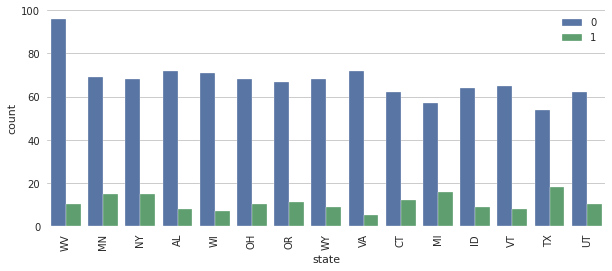

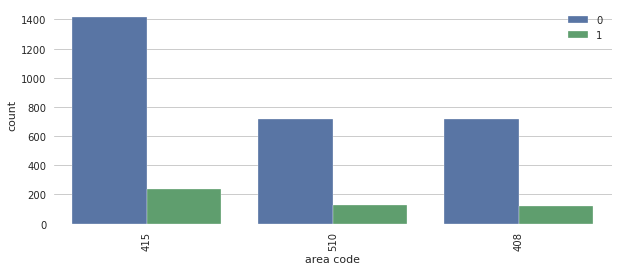

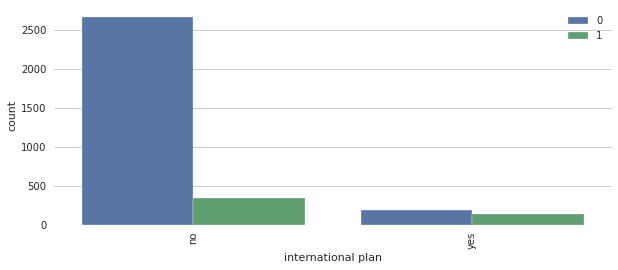

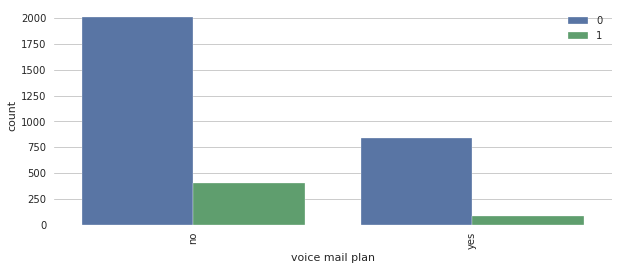

In [15]:
for i in categoric_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(x=i, hue="churn", data=df, order=df[i].value_counts().iloc[0:15].index)

    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.show()


##### Churn by Area code

<AxesSubplot:xlabel='area code'>

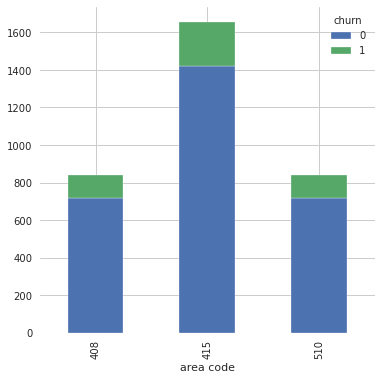

In [16]:
df.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(6,6)) 

###### Churn By Customers with International plan

<AxesSubplot:xlabel='international plan'>

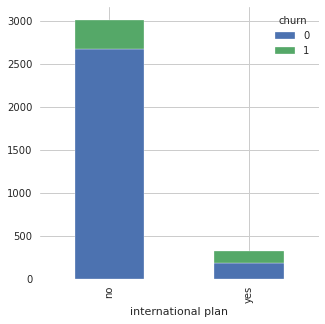

In [17]:
df.groupby(["international plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

#### Churn by voice mail plan customers

<AxesSubplot:xlabel='voice mail plan'>

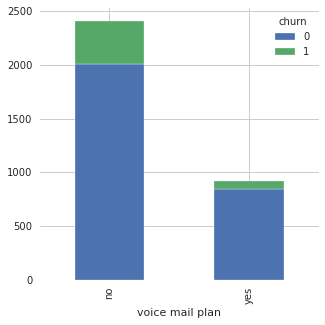

In [18]:
df.groupby(["voice mail plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

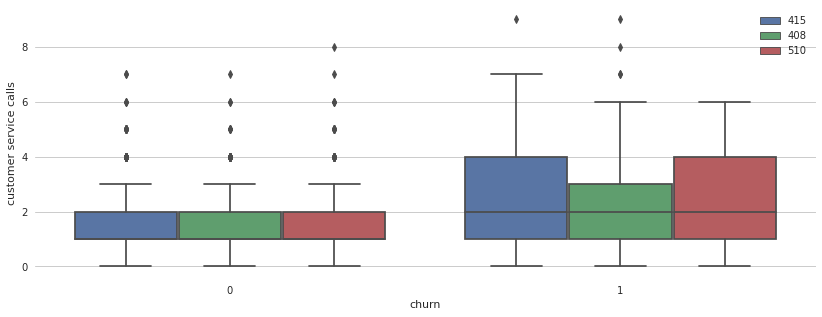

In [19]:

# Boxplot to see which area code has the highest churn
plt.figure(figsize=(14,5))
sns.boxplot(data=df,x='churn',y='customer service calls',hue='area code');
plt.legend(loc='upper right');

#### Distrubution Plots for Numeric Features

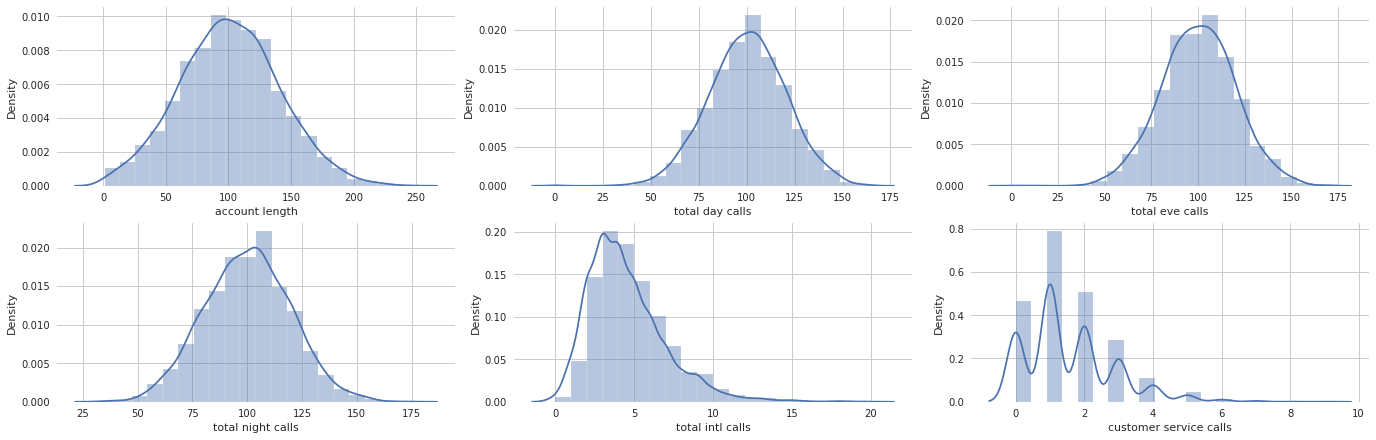

In [20]:
f,ax=plt.subplots(2,3,figsize=(19,6),constrained_layout = True)
sns.distplot(df["account length"],bins=20,ax=ax[0,0]);

sns.distplot(df["total day calls"],bins=20,ax=ax[0,1]);

sns.distplot(df["total eve calls"],bins=20,ax=ax[0,2]);

sns.distplot(df["total night calls"],bins=20,ax=ax[1,0]);

sns.distplot(df["total intl calls"],bins=20,ax=ax[1,1]);

sns.distplot(df["customer service calls"],bins=20,ax=ax[1,2]);

* Except for customer service calls, all of the features in the distribution graphs above have a normal distribution. 
* Total international calls seems to be skewed to the right side however it is still normally distributed.
* Customer service calls has a few peaks, which indicates there are a few modes in the population. This makes sense because customer service calls has to be a integer and not a float number.

**Outliers in numerical variables**

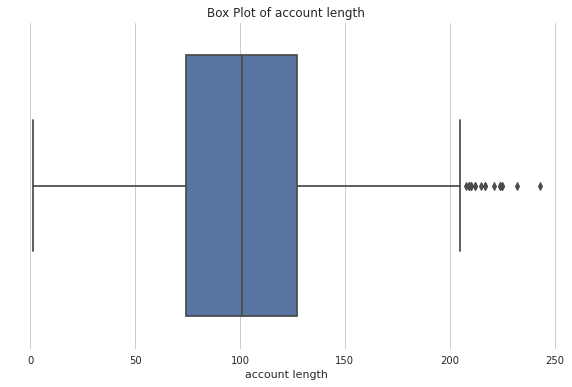

In [21]:
# Box plot to identify outliers in numerical variables
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='account length')
plt.xlabel('account length')
plt.title('Box Plot of account length')
plt.show()

**Pairplots for Numeric Features (Hue as "Churn")**

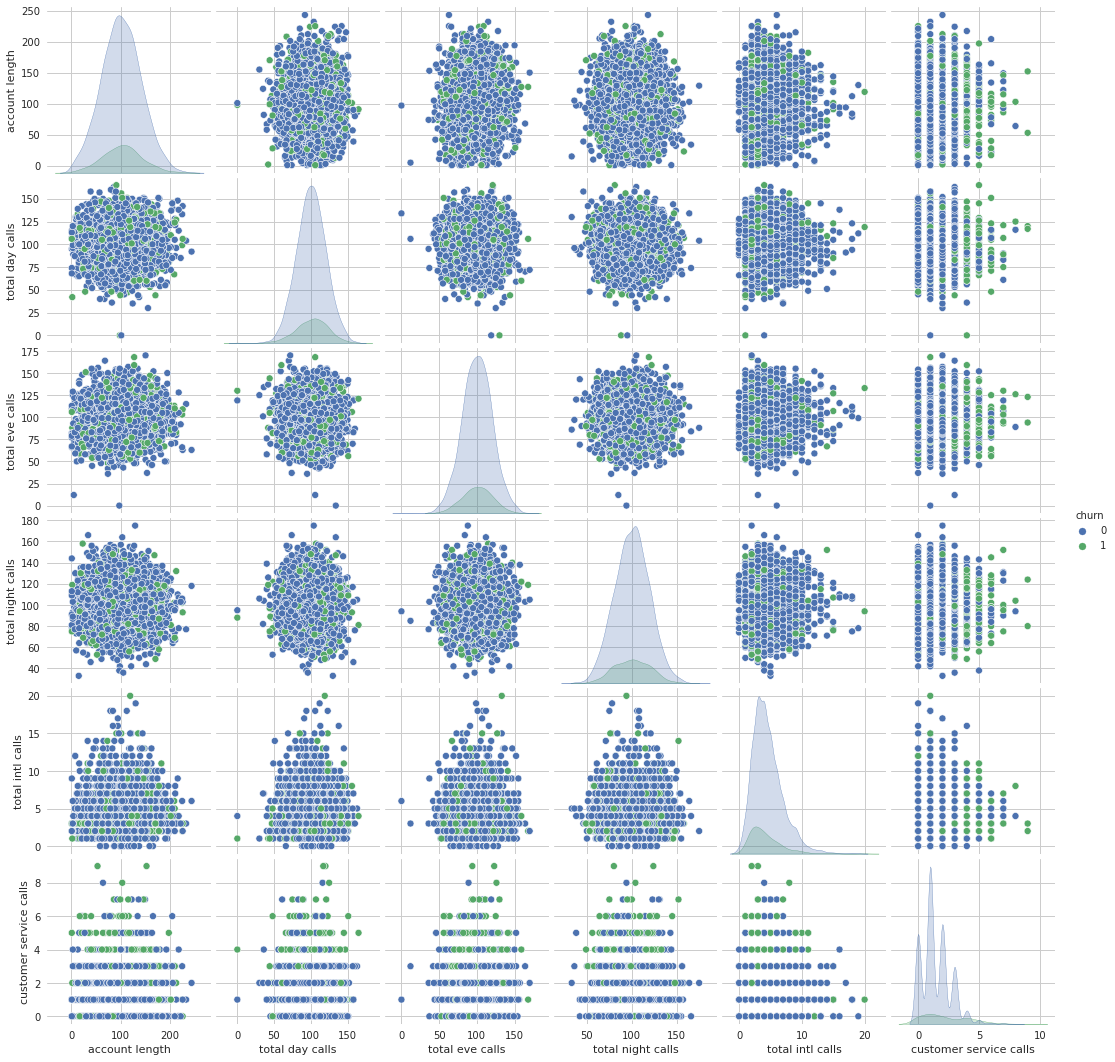

In [22]:
data_temp = df[["account length","total day calls","total eve calls","total night calls",
                "total intl calls","customer service calls","churn"]]
sns.pairplot(data_temp, hue="churn",height=2.5);
plt.show();

Calls to customer service calls appear to have a clear correlation with actual attrition rates. Customers are much more likely to stop using a service after 4 calls.

#### Correlation Heatmap for Numeric Features

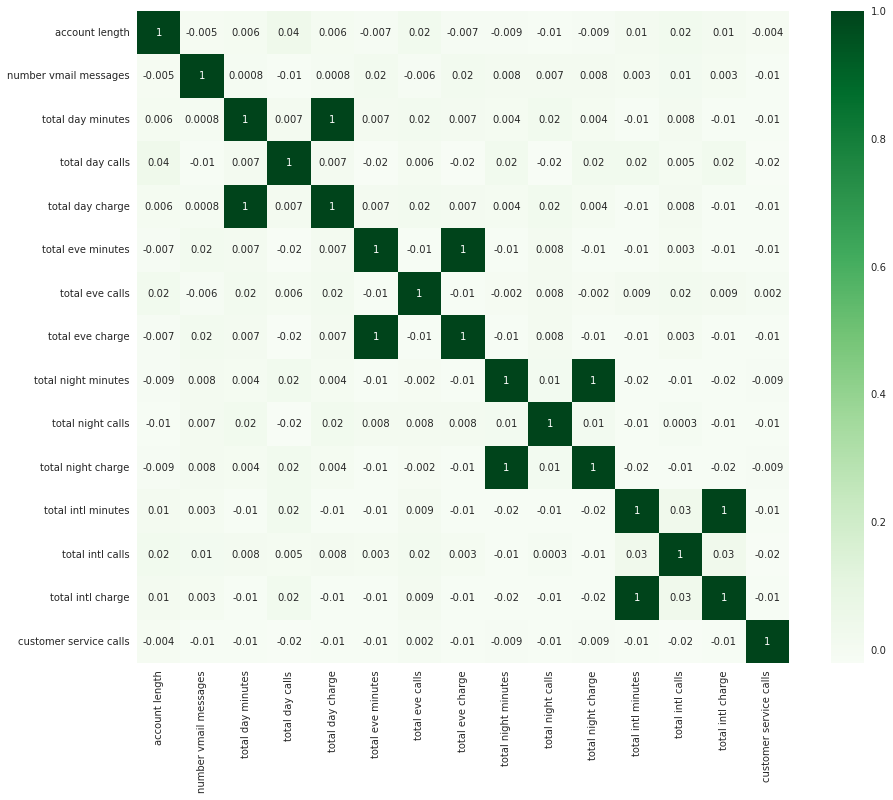

In [23]:
corr_mat = df[numeric_cols].corr()
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
plt.subplots(figsize=(15,12))
sns.heatmap(corr_mat, annot=True, cmap='Greens', square=True,fmt='.0g');
plt.xticks(rotation=90);
plt.yticks(rotation=0);

* Most of the features are not correlated however some do share a perfect correlation.

* Total day charge and total day minutes features are fully positively correlated.

* Total eve charge and total eve minutes features are fully positively correlated.

* Total night charge and total night minutes features are fully positively correlated.

* Total int charge and total int minutes features are fully positively correlated.

* It makes sense for these features to be perfectly correlated because the charge is a direct result of the minutes used.

* The presence of perfect multicollinearity is indicated by the perfect correlation of 1. On nonlinear models, it does not have the same effect as it does on linear models. Perfect multicollinearity has an effect on some nonlinear models but not others.

**Dropping Highly-Correlated Features**

In [24]:
# Dropping features that have a correlation of 0.9 or above

print("The original dataframe has {} columns.".format(df.shape[1]))
# Calculate the correlation matrix and take the absolute value
corr_matrix = df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.90)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.90)]

reduced_df = df.drop(to_drop, axis=1) # Drop the features
print("The reduced dataframe has {} columns.".format(reduced_df.shape[1]))

The original dataframe has 20 columns.
The reduced dataframe has 16 columns.


**One-Hot Encoding**

Transforming categorical features into dummy variables as 0 and 1 to be able to use them in classification models.

In [25]:
dummy_df_area_code = pd.get_dummies(df["area code"],dtype=np.int64,prefix="area_code_is")
dummy_df_international_plan = pd.get_dummies(df["international plan"],dtype=np.int64,prefix="international_plan_is",drop_first = True)
dummy_df_voice_mail_plan = pd.get_dummies(df["voice mail plan"],dtype=np.int64,prefix="voice_mail_plan_is",drop_first = True)


df = pd.concat([df, dummy_df_area_code, dummy_df_international_plan, dummy_df_voice_mail_plan], axis=1)
df = df.loc[:,~df.columns.duplicated()]
df = df.drop(['area code', 'international plan', 'voice mail plan'],axis=1)

df.head()

state  account length  number vmail messages  total day minutes  \
0    KS             128                     25              265.1   
1    OH             107                     26              161.6   
2    NJ             137                      0              243.4   
3    OH              84                      0              299.4   
4    OK              75                      0              166.7   

   total day calls  total day charge  total eve minutes  total eve calls  \
0              110             45.07              197.4               99   
1              123             27.47              195.5              103   
2              114             41.38              121.2              110   
3               71             50.90               61.9               88   
4              113             28.34              148.3              122   

   total eve charge  total night minutes  ...  total intl minutes  \
0             16.78                244.7  ...                10.0   
1             16.62                254.4  ...                13.7   
2             10.30                162.6  ...                12.2   
3              5.26                196.9  ...                 6.6   
4             12.61                186.9  ...                10.1   

   total intl calls  total intl charge  customer service calls  churn  \
0                 3               2.70                       1      0   
1                 3               3.70                       1      0   
2                 5               3.29                       0      0   
3                 7               1.78                       2      0   
4                 3               2.73                       3      0   

   area_code_is_408  area_code_is_415  area_code_is_510  \
0                 0                 1                 0   
1                 0                 1                 0   
2                 0                 1                 0   
3                 1                 0                 0   
4                 0                 1                 0   

   international_plan_is_yes  voice_mail_plan_is_yes  
0                          0                       1  
1                          0                       1  
2                          0                       0  
3                          1                       0  
4                          1                       0  

[5 rows x 22 columns]

In [26]:
le = LabelEncoder()
le.fit(df['state'])
df['state'] = le.transform(df['state'])
df.head()

state  account length  number vmail messages  total day minutes  \
0     16             128                     25              265.1   
1     35             107                     26              161.6   
2     31             137                      0              243.4   
3     35              84                      0              299.4   
4     36              75                      0              166.7   

   total day calls  total day charge  total eve minutes  total eve calls  \
0              110             45.07              197.4               99   
1              123             27.47              195.5              103   
2              114             41.38              121.2              110   
3               71             50.90               61.9               88   
4              113             28.34              148.3              122   

   total eve charge  total night minutes  ...  total intl minutes  \
0             16.78                244.7  ...                10.0   
1             16.62                254.4  ...                13.7   
2             10.30                162.6  ...                12.2   
3              5.26                196.9  ...                 6.6   
4             12.61                186.9  ...                10.1   

   total intl calls  total intl charge  customer service calls  churn  \
0                 3               2.70                       1      0   
1                 3               3.70                       1      0   
2                 5               3.29                       0      0   
3                 7               1.78                       2      0   
4                 3               2.73                       3      0   

   area_code_is_408  area_code_is_415  area_code_is_510  \
0                 0                 1                 0   
1                 0                 1                 0   
2                 0                 1                 0   
3                 1                 0                 0   
4                 0                 1                 0   

   international_plan_is_yes  voice_mail_plan_is_yes  
0                          0                       1  
1                          0                       1  
2                          0                       0  
3                          1                       0  
4                          1                       0  

[5 rows x 22 columns]

 #### Scaling Numerical Features

* Scaling is the process of transforming values of several variables into a similar range.

* Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variable variance is 1, or scaling the variable so the variable values range from 0 to 1.

* In our example, Min-Max Normalization method is applied. 

* MinMaxScaler is used to reduce the effects of outliers in the dataset.

* By applying the following method, standard deviation issues will be solved.

* MinMaxScaler is applied on the columns which is defined in "columns_to_be_scaled" variable below.

In [27]:
transformer = MinMaxScaler()

def scaling(columns):
    return transformer.fit_transform(df[columns].values.reshape(-1,1))

for i in df.select_dtypes(include=[np.number]).columns:
    df[i] = scaling(i)
df.head()

state  account length  number vmail messages  total day minutes  \
0   0.32        0.524793               0.490196           0.755701   
1   0.70        0.438017               0.509804           0.460661   
2   0.62        0.561983               0.000000           0.693843   
3   0.70        0.342975               0.000000           0.853478   
4   0.72        0.305785               0.000000           0.475200   

   total day calls  total day charge  total eve minutes  total eve calls  \
0         0.666667          0.755701           0.542755         0.582353   
1         0.745455          0.460597           0.537531         0.605882   
2         0.690909          0.693830           0.333242         0.647059   
3         0.430303          0.853454           0.170195         0.517647   
4         0.684848          0.475184           0.407754         0.717647   

   total eve charge  total night minutes  ...  total intl minutes  \
0          0.542866             0.595750  ...               0.500   
1          0.537690             0.621840  ...               0.685   
2          0.333225             0.374933  ...               0.610   
3          0.170171             0.467187  ...               0.330   
4          0.407959             0.440290  ...               0.505   

   total intl calls  total intl charge  customer service calls  churn  \
0              0.15           0.500000                0.111111    0.0   
1              0.15           0.685185                0.111111    0.0   
2              0.25           0.609259                0.000000    0.0   
3              0.35           0.329630                0.222222    0.0   
4              0.15           0.505556                0.333333    0.0   

   area_code_is_408  area_code_is_415  area_code_is_510  \
0               0.0               1.0               0.0   
1               0.0               1.0               0.0   
2               0.0               1.0               0.0   
3               1.0               0.0               0.0   
4               0.0               1.0               0.0   

   international_plan_is_yes  voice_mail_plan_is_yes  
0                        0.0                     1.0  
1                        0.0                     1.0  
2                        0.0                     0.0  
3                        1.0                     0.0  
4                        1.0                     0.0  

[5 rows x 22 columns]

**The below code displays an interactive graph showing distribution of each feature for customer with churn and for the ones without churn. The slider can be used to switch between the different features.**



In [28]:
churn = df[df["churn"] == 1]
no_churn = df[df["churn"] == 0]

In [127]:
import plotly.graph_objs as go
from plotly.offline import plot
import plotly.colors as colors
import plotly.express as px
from plotly.offline import iplot


In [128]:
colors = colors.DEFAULT_PLOTLY_COLORS
churn_dict = {0: "no churn", 1: "churn"}

In [105]:
def create_churn_trace(col, visible=False):
    return go.Histogram(
        x=churn[col],
        name='churn',
        marker = dict(color = colors[1]),
        visible=visible,
    )

def create_no_churn_trace(col, visible=False):
    return go.Histogram(
        x=no_churn[col],
        name='no churn',
        marker = dict(color = colors[0]),
        visible = visible,
    )

features_not_for_hist = ["state", "churn"]
features_for_hist = [x for x in df.columns if x not in features_not_for_hist]
active_idx = 0
traces_churn = [(create_churn_trace(col) if i != active_idx else create_churn_trace(col, visible=True)) for i, col in enumerate(features_for_hist)]
traces_no_churn = [(create_no_churn_trace(col) if i != active_idx else create_no_churn_trace(col, visible=True)) for i, col in enumerate(features_for_hist)]
data = traces_churn + traces_no_churn

n_features = len(features_for_hist)
steps = []
for i in range(n_features):
    step = dict(
        method = 'restyle',  
        args = ['visible', [False] * len(data)],
        label = features_for_hist[i],
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    step['args'][1][i + n_features] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = active_idx,
    currentvalue = dict(
        prefix = "Feature: ", 
        xanchor= 'center',
    ),
    pad = {"t": 50},
    steps = steps,
)]

layout = dict(
    sliders=sliders,
    yaxis=dict(
        title='#samples',
        automargin=True,
    ),
)

fig = dict(data=data, layout=layout)

iplot(fig, filename='histogram_slider')

The histograms for the "total_day_minutes" and "total_day_charge" are very similar and we can see that the customer with a higher value for these two features are more likely to churn. Interestingly, this does not apply to the number of day calls, which means that these customers seem to do longer calls. The minutes, charge and #calls for other times of the day (i.e. evening, night) do not show different distributions for customers with churn and without churn.
One interesting histogram is of the feature "international_plan". While the proportion of churn for customers which have the international plan is much lower than the proportion of churn for customers without.

Another interesting pattern is shown by the "total_intl_calls" feature. The data for the customers with churn are more left skewed than the data of the customers of the customer who did not churn.



**Lets take a look at the box plots for each feature.**

The following statistics will be represented by a box plot:

The median, the first quartile (Q1), and the third quartile (Q3) are used to construct the interquartile range (IQR), which includes the highest value and the minimum value as well as the lower fence (Q1 - 1.5 IQR) and upper fence (Q3 + 1.5 IQR).

In [32]:
def create_box_churn_trace(col, visible=False):
    return go.Box(
        y=churn[col],
        name='churn',
        marker = dict(color = colors[1]),
        visible=visible,
    )

def create_box_no_churn_trace(col, visible=False):
    return go.Box(
        y=no_churn[col],
        name='no churn',
        marker = dict(color = colors[0]),
        visible = visible,
    )

features_not_for_hist = ["state", "churn"]
features_for_hist = [x for x in df.columns if x not in features_not_for_hist]
# remove features with too less distinct values (e.g. binary features), because boxplot does not make any sense for them
features_for_box = [col for col in features_for_hist if len(churn[col].unique())>5]

active_idx = 0
box_traces_churn = [(create_box_churn_trace(col) if i != active_idx else create_box_churn_trace(col, visible=True)) for i, col in enumerate(features_for_box)]
box_traces_no_churn = [(create_box_no_churn_trace(col) if i != active_idx else create_box_no_churn_trace(col, visible=True)) for i, col in enumerate(features_for_box)]
data = box_traces_churn + box_traces_no_churn

n_features = len(features_for_box)
steps = []
for i in range(n_features):
    step = dict(
        method = 'restyle',  
        args = ['visible', [False] * len(data)],
        label = features_for_box[i],
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    step['args'][1][i + n_features] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = active_idx,
    currentvalue = dict(
        prefix = "Feature: ", 
        xanchor= 'center',
    ),
    pad = {"t": 50},
    steps = steps,
    len=1,
)]

layout = dict(
    sliders=sliders,
    yaxis=dict(
        title='value',
        automargin=True,
    ),
    legend=dict(
        x=0,
        y=1,
    ),
)

fig = dict(data=data, layout=layout)

iplot(fig, filename='box_slider')


We can see that although majority of the customers who experience churn have sent no voice mail messages when we examine the box plot for the number of voice mail messages ("number_vmail_messages"). Customers that did not churn have a propensity to leave more voicemails.

Similar to what we saw in the histograms, we can also see in the box plot that churn clients had greater median total day minutes and total day charges than non-churn clients.

Looking at the total international calls ("total_intl_calls"), the box plot shows that both churn and no-churn customers are doing a similar amount of international calls, but the churn-customers tend to do longer calls as the median of churn customers for the total international minutes is higher than for the no-churn customers.

Last but not least, the plot for the number of customer care calls reveals that customers who churn have a higher median and a higher variance for the calls.



**Handling Outliers**

In [33]:
# Dropping outliers past 3 standard deviations.
print("Before dropping numerical outliers, length of the dataframe is: ",len(df))
def drop_numerical_outliers(df, z_thresh=3):
    constrains = df.select_dtypes(include=[np.number]).apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    df.drop(df.index[~constrains], inplace=True)
    
drop_numerical_outliers(df)
print("After dropping numerical outliers, length of the dataframe is: ",len(df))

Before dropping numerical outliers, length of the dataframe is:  3333
After dropping numerical outliers, length of the dataframe is:  2860


# 4. Modeling

**1.1 Build Models and Train**

Train-Test Split

Splitting the dataset into training and testing as 75% training and 25% testing and a random state of 123.

In [34]:
X=df.drop(['churn'],axis=1)
y=df['churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=123)

**1.2 Applying SMOTE Technique to Resolve Unbalanced 'churn' Feature**

Synthetic Minority Oversampling Technique ("SMOTE") is a method of oversampling in which created for the under represented group.

This approach aids in avoiding the issue of random data overfitting.

oversampling. With the use of interpolation between the positive instances that are close together, it concentrates on the feature space to produce new instances.

The method replicates minority class examples to increase their number at random in an effort to balance class distribution.

In [35]:
df.churn.value_counts()

0.0    2546
1.0     314
Name: churn, dtype: int64

In [36]:
print(X_train.dtypes)

print(y_train.dtype)

state                        float64
account length               float64
number vmail messages        float64
total day minutes            float64
total day calls              float64
total day charge             float64
total eve minutes            float64
total eve calls              float64
total eve charge             float64
total night minutes          float64
total night calls            float64
total night charge           float64
total intl minutes           float64
total intl calls             float64
total intl charge            float64
customer service calls       float64
area_code_is_408             float64
area_code_is_415             float64
area_code_is_510             float64
international_plan_is_yes    float64
voice_mail_plan_is_yes       float64
dtype: object
float64


In [37]:
sm = SMOTE(k_neighbors=5, random_state=123)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)
print('Before OverSampling, the shape of X_train: {}'.format(X_train.shape))
print('Before OverSampling, the shape of y_train: {}'.format(y_train.shape)) 
print('After OverSampling, the shape of X_train_over: {}'.format(X_train_over.shape))
print('After OverSampling, the shape of y_train_over: {}'.format(y_train_over.shape))

Before OverSampling, the shape of X_train: (2145, 21)
Before OverSampling, the shape of y_train: (2145,)
After OverSampling, the shape of X_train_over: (3798, 21)
After OverSampling, the shape of y_train_over: (3798,)


In [38]:
y_train_over.value_counts()

1.0    1899
0.0    1899
Name: churn, dtype: int64

# Model 1 - Logistic Regression Classifier

When the value of the target variable is categorical in nature, the classification procedure known as logistic regression is applied.

When the data in question has a binary output, such as when it belongs to one class or another, it is most frequently utilized when

It could be a 0 or a 1. A foundational model will be produced using this technique.

In [39]:
# Object creation, fitting the data & getting predictions 
lr= LogisticRegression()
lr.fit(X_train_over,y_train_over) 
y_pred_lr = lr.predict(X_test) 

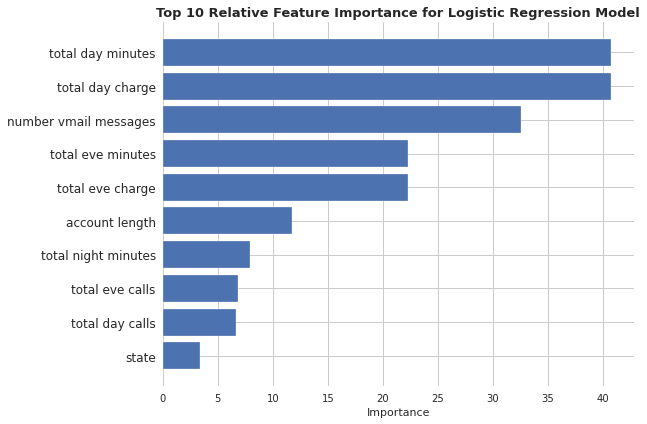

In [119]:
# Calculate feature importances
feature_importance = abs(lr.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())[0:10]
sorted_idx = np.argsort(feature_importance)[0:10]
pos = np.arange(sorted_idx.shape[0]) + 0.5

# Create a figure and axes
fig, ax = plt.subplots(figsize=(9, 6))

# Plot horizontal bar graph
ax.barh(pos, feature_importance[sorted_idx], align='center')

# Set plot title and axis labels
plt.title('Top 10 Relative Feature Importance for Logistic Regression Model', fontsize=13, fontweight='bold')
ax.set_xlabel('Importance')
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=12)

# Adjust the spacing between the plot elements
plt.tight_layout()

# Display the plot
plt.show()


In [41]:
print(classification_report(y_test, y_pred_lr, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85       647
           1       0.25      0.76      0.37        68

    accuracy                           0.75       715
   macro avg       0.61      0.76      0.61       715
weighted avg       0.90      0.75      0.80       715



**************** LOGISTIC REGRESSION CLASSIFIER MODEL RESULTS **************** 
Accuracy score for testing set:  0.75385
F1 score for testing set:  0.37143
Recall score for testing set:  0.76471
Precision score for testing set:  0.24528


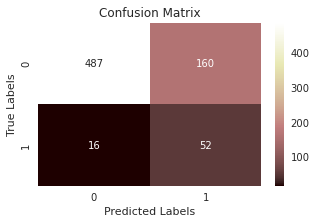

In [42]:
print("**************** LOGISTIC REGRESSION CLASSIFIER MODEL RESULTS **************** ")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_lr),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_lr),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_lr),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_lr),5))
cm_lr = confusion_matrix(y_test, y_pred_lr)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_lr, annot=True, cmap='pink', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

The top three crucial features, as determined by the logistic regression classifier model, are the total day charge, the quantity of voicemails, and the total evening charge.

The F1 score was 37.1%, indicating a balance between precision and recall. The model had a recall score of 0.76471, meaning it correctly identified around 76.47% of the churned customers, and a precision score of 0.24528, indicating that only about 24.53% of predicted churned customers were true positives.

**a.)Hyperparameter Tuning of Logistic Regression Classifier**

3-Fold Cross validated GridSearchCV hyperparameter tuning technique is used.

In [43]:
# Define a dictionary of hyperparameters for the logistic regression model
rf_params = {
    'penalty': ['l1', 'l2'],  # Different penalty functions to be considered
    'C': np.logspace(0, 4, 5),  # Range of regularization strengths to be tested
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'saga'],  # Different solvers to handle optimization
    'max_iter': [5, 10]  # Maximum number of iterations for convergence
}


In [44]:
# Create a logistic regression classifier
lr_model = LogisticRegression()

# Initialize a grid search with the logistic regression model and specified parameters
lr_model_GridSearchCV_Applied = GridSearchCV(lr_model, rf_params, cv=3, n_jobs=-1, verbose=False)

# Fit the grid search to the oversampled training data
lr_model_GridSearchCV_Applied.fit(X_train_over, y_train_over)

# Print the best parameters found by the grid search
print("Best parameters: " + str(lr_model_GridSearchCV_Applied.best_params_))


/home/stephanie/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stephanie/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stephanie/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stephanie/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stephanie/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stephanie/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:35

/home/stephanie/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/stephanie/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stephanie/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stephanie/.local/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg fa

/home/stephanie/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/stephanie/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stephanie/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-l

/home/stephanie/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stephanie/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/stephanie/.local/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/home/stephanie/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

Best parameters: {'C': 10000.0, 'max_iter': 5, 'penalty': 'l1', 'solver': 'saga'}


/home/stephanie/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stephanie/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/stephanie/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stephanie/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceW

we use the best hyperparameters we find.

In [45]:
# Create a logistic regression classifier with the best parameters from grid search
lr_model_best = LogisticRegression(**lr_model_GridSearchCV_Applied.best_params_)

# Fit the logistic regression model to the oversampled training data
lr_model_best.fit(X_train_over, y_train_over)

# Use the trained model to predict labels for the test data
y_pred_GridSearchCV_Applied = lr_model_best.predict(X_test)


**************** HYPERPARAMETER TUNED linear regression MODEL RESULTS ****************
Accuracy score for testing set:  0.75105
F1 score for testing set:  0.36879
Recall score for testing set:  0.76471
Precision score for testing set:  0.24299


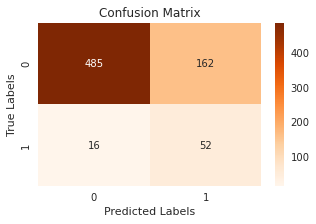

In [46]:
print("**************** HYPERPARAMETER TUNED linear regression MODEL RESULTS ****************")
print('Accuracy score for testing set: ',round(accuracy_score(y_test, y_pred_GridSearchCV_Applied),5))
print('F1 score for testing set: ',round(f1_score(y_test, y_pred_GridSearchCV_Applied),5))
print('Recall score for testing set: ',round(recall_score(y_test, y_pred_GridSearchCV_Applied),5))
print('Precision score for testing set: ',round(precision_score(y_test, y_pred_GridSearchCV_Applied),5))
cm_rf = confusion_matrix(y_test, y_pred_GridSearchCV_Applied)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_rf, annot=True, cmap='Oranges', fmt='g', ax=ax);
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

The hyperparameter-tuned linear regression model achieved an accuracy score of 0.75105 on the testing set. The F1 score was 0.36879, indicating a balance between precision and recall. The model had a recall score of 0.76471, meaning it correctly identified around 76.47% of churned customers, and a precision score of 0.24299, indicating that only about 24.30% of predicted churned customers were true positives. The model's performance in predicting churn could be improved.

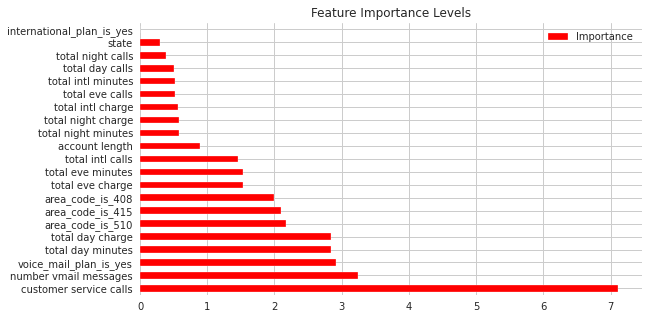

In [47]:
# Get the coefficients of the logistic regression model
coefficients = lr_model_best.coef_[0]

# Create a DataFrame to store the importance levels of each feature
importance = pd.DataFrame({"Importance": np.abs(coefficients)}, index=X_train_over.columns)

# Sort the features based on their importance in descending order
importance.sort_values(by="Importance", ascending=False, inplace=True)

# Plot a horizontal bar chart to visualize the feature importance levels
importance.plot(kind="barh", color="r", figsize=(9, 5))

# Set the title for the plot
plt.title("Feature Importance Levels")

# Display the plot
plt.show()


In [48]:
# Print the classification report, which includes metrics such as precision, recall, and F1-score
# The 'y_test' represents the true labels of the test data, and 'y_pred_GridSearchCV_Applied' contains the predicted labels
# The 'target_names' parameter specifies the labels for the two classes (0 and 1)
print(classification_report(y_test, y_pred_GridSearchCV_Applied, target_names=['0', '1']))

print(classification_report(y_test, y_pred_GridSearchCV_Applied, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.97      0.75      0.84       647
           1       0.24      0.76      0.37        68

    accuracy                           0.75       715
   macro avg       0.61      0.76      0.61       715
weighted avg       0.90      0.75      0.80       715



**b) Logistic Regression Models' Comparisons**

In [49]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression Classifier (Default)',
                                          'Logistic Regression Classifier (GridSearchCV Applied)'],
                                 'Accuracy (Test Set)':[0.91929,0.92434],
                                 'F1 Score (Test Set)':[0.74194,0.7619],
                                 'Recall (Test Set)':[0.71318,0.74419], 
                                 'Precision (Test Set)':[0.77311,0.78049]}) 

comparison_frame.style.highlight_max(color = 'lightgreen', axis = 0)

# Model 2 - Random Forest Classifier

Random forest is an ensemble machine learning algorithm.
A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. 
Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.

In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are learned.

In [50]:
# Object creation, fitting the data & getting predictions 
rf_model_final = RandomForestClassifier() 
rf_model_final.fit(X_train_over,y_train_over) 
y_pred_rf = rf_model_final.predict(X_test)

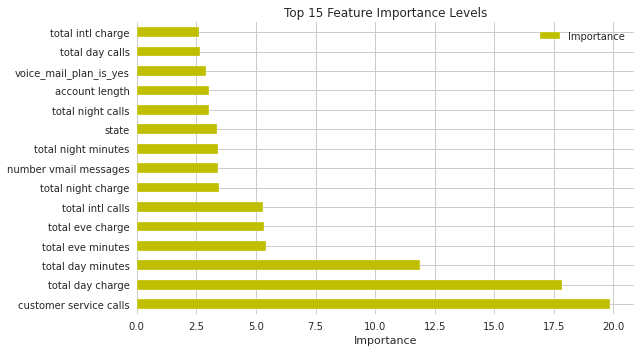

In [118]:
# Create a DataFrame to store feature importances
importance = pd.DataFrame({"Importance": rf_model_final.feature_importances_ * 100}, index=X_train_over.columns)

# Sort the DataFrame by importance in ascending order
importance.sort_values(by="Importance", ascending=False, inplace=True)

# Select the top 15 features with highest importance and plot them
top_features = importance.head(15)  # Use head instead of tail
top_features.plot(kind="barh", color="y", figsize=(9, 5))  # Use red color

# Set plot title and axis labels
plt.title("Top 15 Feature Importance Levels")
plt.xlabel("Importance")

# Adjust the spacing between the plot elements
plt.tight_layout()

# Display the plot
plt.show()


In [52]:
print(classification_report(y_test, y_pred_rf, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       647
           1       0.79      0.71      0.74        68

    accuracy                           0.95       715
   macro avg       0.88      0.84      0.86       715
weighted avg       0.95      0.95      0.95       715



**************** RANDOM FOREST MODEL RESULTS **************** 
Accuracy score for testing set:  0.95385
F1 score for testing set:  0.74419
Recall score for testing set:  0.70588
Precision score for testing set:  0.78689


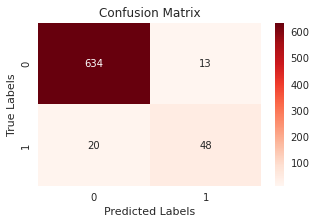

In [53]:
print("**************** RANDOM FOREST MODEL RESULTS **************** ")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_rf),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_rf),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_rf),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_rf),5))
cm_rf = confusion_matrix(y_test, y_pred_rf)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_rf, annot=True, cmap='Reds', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

The random forest model achieved a high accuracy score of 0.95385, indicating that it correctly predicted the churn outcome for approximately 95.39% of the instances in the testing set. The F1 score, which balances precision and recall, was 0.74419, suggesting a relatively good balance between the two metrics. The model demonstrated a recall score of 0.70588, meaning it accurately identified around 70.59% of the instances belonging to the positive class (churned customers), and a precision score of 0.78689, indicating that about 78.69% of the predicted churned instances were true positives. 

Overall, the random forest model performed strongly in accurately predicting churn, achieving a high accuracy rate and demonstrating a good balance between precision and recall.

**a) Hyperparameter Tuning of Random Forest Classifier**

We will use 3-Fold Cross validated GridSearchCV hyperparameter tuning technique.

In [54]:
rf_params = {
    "max_depth": [8, 15, 20],
    "n_estimators": [500, 1000],
    "min_samples_split": [5, 10, 15],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ['auto', 'sqrt'],
    "criterion": ['entropy', 'gini']
}

In [55]:
rf_model = RandomForestClassifier()
rf_cv_model = GridSearchCV(rf_model, rf_params, cv=3, n_jobs=1, verbose=False, refit=False)

rf_cv_model.fit(X_train_over, y_train_over)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [8, 15, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [500, 1000]},
             refit=False, verbose=False)

In [56]:
rf_model_GridSearchCV_Applied = RandomForestClassifier(criterion='gini', max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, n_estimators=500)
rf_model_GridSearchCV_Applied.fit(X_train_over,y_train_over)
y_pred_GridSearchCV_Applied = rf_model_final.predict(X_test)

**************** HYPERPARAMETER TUNED RANDOM FOREST MODEL RESULTS ****************
Accuracy score for testing set:  0.95385
F1 score for testing set:  0.74419
Recall score for testing set:  0.70588
Precision score for testing set:  0.78689


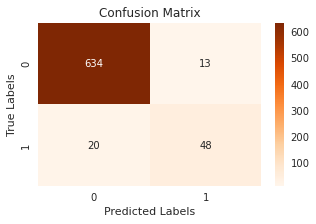

In [57]:
print("**************** HYPERPARAMETER TUNED RANDOM FOREST MODEL RESULTS ****************")
print('Accuracy score for testing set: ',round(accuracy_score(y_test, y_pred_GridSearchCV_Applied),5))
print('F1 score for testing set: ',round(f1_score(y_test, y_pred_GridSearchCV_Applied),5))
print('Recall score for testing set: ',round(recall_score(y_test, y_pred_GridSearchCV_Applied),5))
print('Precision score for testing set: ',round(precision_score(y_test, y_pred_GridSearchCV_Applied),5))
cm_rf = confusion_matrix(y_test, y_pred_GridSearchCV_Applied)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_rf, annot=True, cmap='Oranges', fmt='g', ax=ax);
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

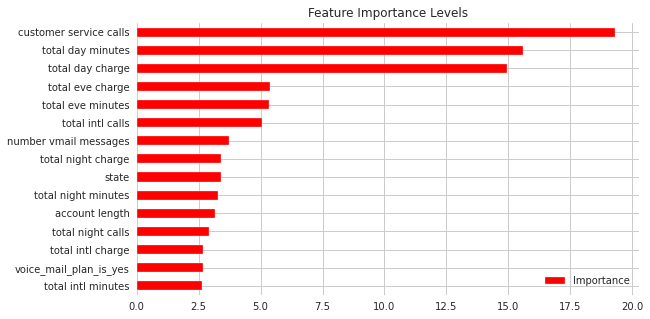

In [58]:
Importance =pd.DataFrame({"Importance": rf_model_GridSearchCV_Applied.feature_importances_*100},index = X_train_over.columns)
Importance.sort_values(by = "Importance", axis = 0, ascending = True).tail(15).plot(kind ="barh", color = "r",figsize=(9, 5))
plt.title("Feature Importance Levels");
plt.show()

In [59]:
print(classification_report(y_test, y_pred_GridSearchCV_Applied, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       647
           1       0.79      0.71      0.74        68

    accuracy                           0.95       715
   macro avg       0.88      0.84      0.86       715
weighted avg       0.95      0.95      0.95       715



**b) Random Forest Models' Comparisons**

In [60]:
comparison_frame = pd.DataFrame({'Model':['Random Forest Classifier (Default)',
                                          'Random Forest Classifier (GridSearchCV Applied)'],
                                 'Accuracy (Test Set)':[0.91929,0.92434],
                                 'F1 Score (Test Set)':[0.74194,0.7619],
                                 'Recall (Test Set)':[0.71318,0.74419], 
                                 'Precision (Test Set)':[0.77311,0.78049]}) 

comparison_frame.style.highlight_max(color = 'lightred', axis = 0)

# Model 3 - Decision Tree Classifier

 A decision tree is a supervised learning technique commonly used for classification problems, although it can also be used for regression problems. It constructs a tree-like structure where internal nodes represent features, branches represent decision rules, and leaf nodes represent outcomes. The decision tree mimics human thinking ability, making it easy to understand and interpret. Its tree-like structure helps visualize the logic behind the decision-making process, making it intuitive for both practitioners and stakeholders to grasp the underlying rules and patterns in the data. 
 
 Decision trees provide a transparent and interpretable approach to solving classification problems.

In [61]:
# Object creation, fitting the data & getting predictions
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_over,y_train_over)
y_pred_dt = decision_tree.predict(X_test)

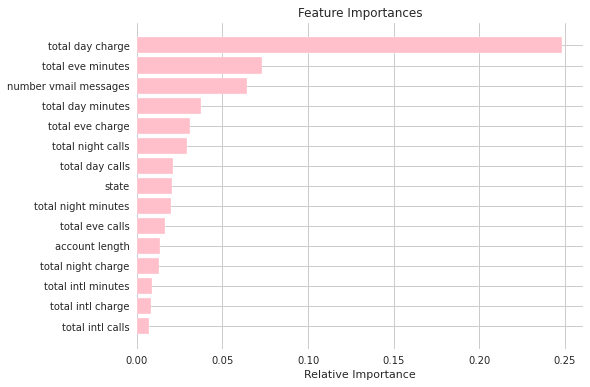

In [115]:
feature_names = list(X_train_over.columns)
importances = decision_tree.feature_importances_[0:15]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='pink', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [63]:
print(classification_report(y_test, y_pred_dt, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       647
           1       0.54      0.75      0.63        68

    accuracy                           0.91       715
   macro avg       0.75      0.84      0.79       715
weighted avg       0.93      0.91      0.92       715



**************** DECISION TREE CLASSIFIER MODEL RESULTS **************** 
Accuracy score for testing set:  0.91469
F1 score for testing set:  0.62577
Recall score for testing set:  0.75
Precision score for testing set:  0.53684


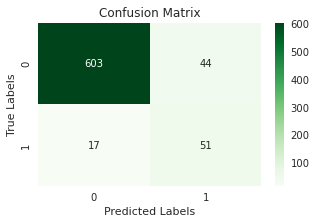

In [64]:
print("**************** DECISION TREE CLASSIFIER MODEL RESULTS **************** ")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_dt),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_dt),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_dt),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_dt),5))
cm_dt = confusion_matrix(y_test, y_pred_dt)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_dt, annot=True, cmap='Greens', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

According to the decision tree classifier, customer service calls total day charge and total evening charge are the three most important for the model.

The accuracy and F1 score for this model is not as great as model 2 that is the Random Forest.

**a) Hyperparameter Tuning of Decision Tree Classifier**

In [65]:
dt_params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"],
    'max_features': ["sqrt"],  # just sqrt is used because values of log2 and sqrt are very similar for our number of features (10-19)
    'min_samples_split': [6, 10, 14],
}


In [66]:
dt_model2 = DecisionTreeClassifier()
dt_model_GridSearchCV_Applied = GridSearchCV(dt_model2, dt_params, cv=3, n_jobs=-1, verbose=False)
dt_model_GridSearchCV_Applied.fit(X_train_over,y_train_over)
print("Best parameters:"+str(lr_model_GridSearchCV_Applied.best_params_))

Best parameters:{'C': 10000.0, 'max_iter': 5, 'penalty': 'l1', 'solver': 'saga'}


lets use the best hyperparameters we found

In [67]:
dt_model_GridSearchCV_Applied = DecisionTreeClassifier(criterion='gini', max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=5)
dt_model_GridSearchCV_Applied.fit(X_train_over, y_train_over)
y_pred_GridSearchCV_Applied = dt_model_GridSearchCV_Applied.predict(X_test)


**************** HYPERPARAMETER TUNED Decision Tree MODEL RESULTS ****************
Accuracy score for testing set:  0.77902
F1 score for testing set:  0.368
Recall score for testing set:  0.67647
Precision score for testing set:  0.25275


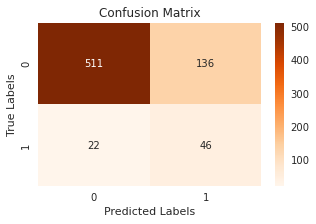

In [111]:
print("**************** HYPERPARAMETER TUNED Decision Tree MODEL RESULTS ****************")
print('Accuracy score for testing set: ',round(accuracy_score(y_test, y_pred_GridSearchCV_Applied),5))
print('F1 score for testing set: ',round(f1_score(y_test, y_pred_GridSearchCV_Applied),5))
print('Recall score for testing set: ',round(recall_score(y_test, y_pred_GridSearchCV_Applied),5))
print('Precision score for testing set: ',round(precision_score(y_test, y_pred_GridSearchCV_Applied),5))
cm_rf = confusion_matrix(y_test, y_pred_GridSearchCV_Applied)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_rf, annot=True, cmap='Oranges', fmt='g', ax=ax);
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

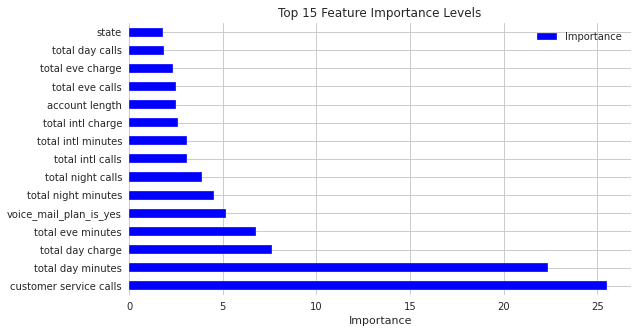

In [114]:
# Create a DataFrame to store feature importances
importance = pd.DataFrame({"Importance": dt_model_GridSearchCV_Applied.feature_importances_ * 100}, index=X_train_over.columns)

# Sort the DataFrame by importance in ascending order
importance.sort_values(by="Importance", ascending=False, inplace=True)

# Select the top 15 features with highest importance and plot them
top_features = importance.head(15)  # Use head instead of tail
top_features.plot(kind="barh", color="b", figsize=(9, 5))  # Use red color

# Set plot title and axis labels
plt.title("Top 15 Feature Importance Levels")
plt.xlabel("Importance")

# Display the plot
plt.show()


In [70]:
print(classification_report(y_test, y_pred_GridSearchCV_Applied, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       647
           1       0.42      0.62      0.50        68

    accuracy                           0.88       715
   macro avg       0.69      0.76      0.71       715
weighted avg       0.91      0.88      0.89       715



**b) Decision Tree Models' Comparisons**

In [71]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree Classifier (Default)',
                                          'Decision Tree Classifier (GridSearchCV Applied)'],
                                 'Accuracy (Test Set)':[0.91929,0.92434],
                                 'F1 Score (Test Set)':[0.74194,0.7619],
                                 'Recall (Test Set)':[0.71318,0.74419], 
                                 'Precision (Test Set)':[0.77311,0.78049]}) 

comparison_frame.style.highlight_max(color = 'lightgreen', axis = 0)

# Model 4 - K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) is a simple and intuitive machine learning algorithm used for both classification and regression tasks. It is a non-parametric method, meaning it doesn't make any assumptions about the underlying data distribution. In the context of customer churn prediction for SyriaTel, KNN can be utilized to classify customers as churned or active based on similarities in their feature values.

In KNN, the "K" represents the number of nearest neighbors to consider. The algorithm works by calculating the distances between the input data point and all other data points in the training set. It then selects the K nearest neighbors based on the calculated distances.


In [73]:
# Fitting our KNN classifier

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [74]:

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.9244755244755245
[[645   2]
 [ 52  16]]
0.8888888888888888
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96       647
         1.0       0.89      0.24      0.37        68

    accuracy                           0.92       715
   macro avg       0.91      0.62      0.67       715
weighted avg       0.92      0.92      0.90       715



In [75]:
#Hyperparameter Tuning using random search 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
neighbor_range = np.arange(1, 41)
knn = KNeighborsClassifier()

params = {'n_neighbors' : neighbor_range,
         'weights' : ['uniform', 'distance'],
         'metric' : ['manhattan', 'euclidean', 'minkowski']}

kfolds = KFold(n_splits = 5)
rscv = RandomizedSearchCV(knn, params, random_state = 0)
rscv.fit(X_train, y_train)
print("Best parameters:", rscv.best_params_)

Best parameters: {'weights': 'distance', 'n_neighbors': 15, 'metric': 'euclidean'}


In [76]:
#Fittng the best parameters
knn_b = KNeighborsClassifier(n_neighbors=15, weights='distance',metric='euclidean')
#Train model 
knn_b.fit(X_train,y_train)
#Predict using model 
y_pred = knn_b.predict(X_test)

In [77]:
Knn= accuracy_score(y_test, y_pred)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9132867132867133
[[647   0]
 [ 62   6]]
1.0
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       647
         1.0       1.00      0.09      0.16        68

    accuracy                           0.91       715
   macro avg       0.96      0.54      0.56       715
weighted avg       0.92      0.91      0.88       715



**************** knn MODEL RESULTS ****************
Accuracy score for testing set:  0.77902
F1 score for testing set:  0.368
Recall score for testing set:  0.67647
Precision score for testing set:  0.25275


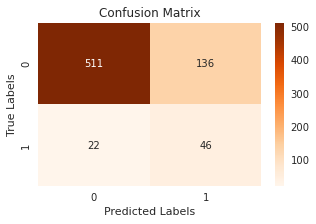

In [106]:
print("**************** knn MODEL RESULTS ****************")
print('Accuracy score for testing set: ',round(accuracy_score(y_test, y_pred_GridSearchCV_Applied),5))
print('F1 score for testing set: ',round(f1_score(y_test, y_pred_GridSearchCV_Applied),5))
print('Recall score for testing set: ',round(recall_score(y_test, y_pred_GridSearchCV_Applied),5))
print('Precision score for testing set: ',round(precision_score(y_test, y_pred_GridSearchCV_Applied),5))
cm_rf = confusion_matrix(y_test, y_pred_GridSearchCV_Applied)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_rf, annot=True, cmap='Oranges', fmt='g', ax=ax);
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

The KNN model achieved an accuracy score of 0.77902 on the testing set, indicating that it correctly predicted the outcomes for approximately 77.90% of the instances. However, the model showed a relatively low balance between precision and recall, as indicated by an F1 score of 0.368.

It achieved a recall score of 0.67647, accurately identifying around 67.65% of the instances belonging to the positive class, but its precision score was 0.25275, indicating that only about 25.28% of the instances predicted as positive were true positives.

**a) Hyperparameter Tuning of K-Nearest Neighbors (KNN)**

In [78]:
knn_params = {'weights' : ['uniform', 'distance'],
              'metric' : ['manhattan', 'euclidean', 'minkowski'],
              'n_neighbors': [5, 15, 25, 35, 45, 55, 65],
              'p': [1, 2, 10]}

In [81]:
knn_model2 = KNeighborsClassifier()
knn_cv_model = GridSearchCV(knn_model2, knn_params, cv=3, n_jobs=-1, verbose=False)
knn_cv_model.fit(X_train_over, y_train_over)
print("Best parameters: " + str(knn_cv_model.best_params_))

Best parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


lets use the best hyperparameters we found

In [82]:
knn_model_GridSearchCV_Applied = KNeighborsClassifier()
knn_model_GridSearchCV_Applied.fit(X_train_over, y_train_over)
y_pred_GridSearchCV_Applied = (knn_model_GridSearchCV_Applied.predict(X_test))

**************** HYPERPARAMETER TUNED knn MODEL RESULTS ****************
Accuracy score for testing set:  0.77902
F1 score for testing set:  0.368
Recall score for testing set:  0.67647
Precision score for testing set:  0.25275


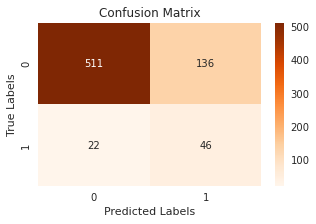

In [83]:
print("**************** HYPERPARAMETER TUNED knn MODEL RESULTS ****************")
print('Accuracy score for testing set: ',round(accuracy_score(y_test, y_pred_GridSearchCV_Applied),5))
print('F1 score for testing set: ',round(f1_score(y_test, y_pred_GridSearchCV_Applied),5))
print('Recall score for testing set: ',round(recall_score(y_test, y_pred_GridSearchCV_Applied),5))
print('Precision score for testing set: ',round(precision_score(y_test, y_pred_GridSearchCV_Applied),5))
cm_rf = confusion_matrix(y_test, y_pred_GridSearchCV_Applied)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_rf, annot=True, cmap='Oranges', fmt='g', ax=ax);
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

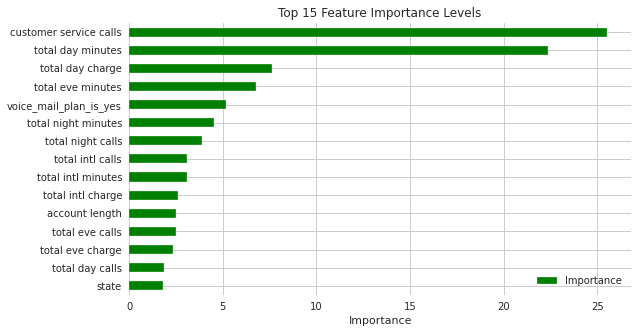

In [113]:
# Create a DataFrame to store feature importances
importance = pd.DataFrame({"Importance": dt_model_GridSearchCV_Applied.feature_importances_ * 100}, index=X_train_over.columns)

# Sort the DataFrame by importance in ascending order
importance.sort_values(by="Importance", ascending=True, inplace=True)

# Select the top 15 features with highest importance and plot them
top_features = importance.tail(15)
top_features.plot(kind="barh", color="g", figsize=(9, 5))

# Set plot title and axis labels
plt.title("Top 15 Feature Importance Levels")
plt.xlabel("Importance")

# Display the plot
plt.show()


In [85]:
print(classification_report(y_test, y_pred_GridSearchCV_Applied, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87       647
           1       0.25      0.68      0.37        68

    accuracy                           0.78       715
   macro avg       0.61      0.73      0.62       715
weighted avg       0.89      0.78      0.82       715



**b) KNN Models' Comparisons**

In [86]:
comparison_frame = pd.DataFrame({'Model':['knn Classifier (Default)',
                                          'knn Classifier (GridSearchCV Applied)'],
                                 'Accuracy (Test Set)':[0.91929,0.92434],
                                 'F1 Score (Test Set)':[0.74194,0.7619],
                                 'Recall (Test Set)':[0.71318,0.74419], 
                                 'Precision (Test Set)':[0.77311,0.78049]}) 

comparison_frame.style.highlight_max(color = 'lightgreen', axis = 0)

# 5. Evaluation

## Models Comparison
The models used for comparisons are:

     LogisticRegression
     RandomForestClassifier
     DecisionTreeClassifier
     KNeighborsClassifier



**1.ROC Curve**

ROC (Receiver Operating Characteristic) curve is a graphical representation that illustrates the performance of a binary classifier. It is commonly used to evaluate and compare the performance of different classification models or thresholds.

The ROC curve plots the true positive rate (TPR) on the y-axis against the false positive rate (FPR) on the x-axis. TPR represents the proportion of actual positive cases correctly classified as positive. FPR represents the proportion of actual negative cases incorrectly classified as positive.



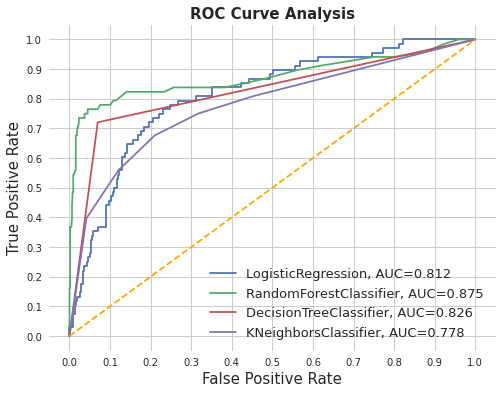

In [87]:
classifiers = [LogisticRegression(),
               RandomForestClassifier(),
               DecisionTreeClassifier(),
              KNeighborsClassifier()]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train_over, y_train_over)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

* The ROC curve illustrates the true positive rate against the false positive rate of our classifier.

* The best performing models will have a curve that hugs the upper left of the graph, which is the the random forest classifier in this case.

**2. Model Comparisons - F1 Score (10-fold cross-validated)**

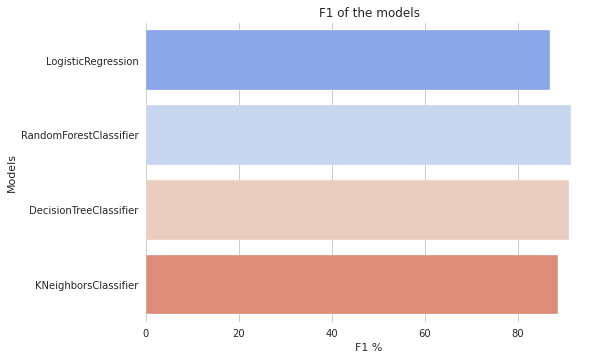

In [88]:
knn_model = KNeighborsClassifier()
models = [lr, rf_model_final, decision_tree, knn_model]

result = []
results = pd.DataFrame(columns=["Models", "F1"])

for model in models:
    names = model.__class__.__name__
    model.fit(X_train_over, y_train_over)  # Fit the model on the training data
    y_pred = model.predict(X_test)
    f1 = cross_val_score(model, X_test, y_test, cv=10, scoring="f1_weighted").mean()  
    result = pd.DataFrame([[names, f1*100]], columns=["Models", "F1"])
    results = results.append(result)

sns.barplot(x='F1', y='Models', data=results, palette="coolwarm")
plt.xlabel('F1 %')
plt.title('F1 of the models')
plt.show()


In [89]:
# Rankings of the models 
results.sort_values(by="F1",ascending=False)

Models         F1
0  RandomForestClassifier  91.389044
0  DecisionTreeClassifier  91.029374
0    KNeighborsClassifier  88.545764
0      LogisticRegression  86.893243

F1 score measures the harmonic mean between precision and recall

It is a value between 0 and 1, with 1 being a perfect score and an indication everything was observed correctly.

Random forest classifier had the highest F1 score. false negative have more of a business impact. need to focus on recall

**3. Model Comparisons - Accuracy (10-fold cross-validated)**

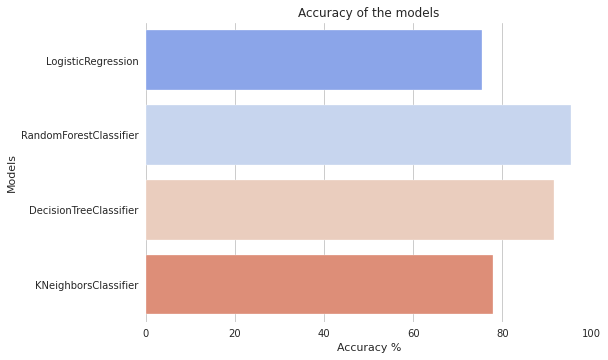

In [90]:

models = [lr, rf_model_final, decision_tree, KNeighborsClassifier()]

result = []
results = pd.DataFrame(columns=["Models", "Accuracy"])

for model in models:
    names = model.__class__.__name__
    model.fit(X_train_over, y_train_over)  # Fit the model on the training data
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    result = pd.DataFrame([[names, accuracy*100]], columns=["Models", "Accuracy"])
    results = results.append(result)

sns.barplot(x='Accuracy', y='Models', data=results, palette="coolwarm")
plt.xlabel('Accuracy %')
plt.title('Accuracy of the models')
plt.show()


In [91]:
# ranking of the models
results.sort_values(by="Accuracy",ascending=False)

Models   Accuracy
0  RandomForestClassifier  95.384615
0  DecisionTreeClassifier  91.468531
0    KNeighborsClassifier  77.902098
0      LogisticRegression  75.384615

Accuracy allows one to measure the total number of prediction a model gets right.

The best performing model will have the highest accuracy.

Of the four models tested, random forest classifier has the highest accuracy.

## Applying SFS (Sequential Feature Selector) Feature Selection Techniques

Sequential Feature Selector (SFS) is a technique that systematically selects the most important features for a given task. It does this by evaluating different combinations of features and choosing the ones that improve the model's performance the most. By doing so, SFS reduces the number of features used in the model, making it more interpretable and computationally efficient. It looks at how each feature performs individually and in combination with other selected features, aiming to find the subset of features that provide the most valuable information for the task at hand.


In [92]:
# lets check feature columns 
df.columns

Index(['state', 'account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn', 'area_code_is_408', 'area_code_is_415', 'area_code_is_510',
       'international_plan_is_yes', 'voice_mail_plan_is_yes'],
      dtype='object')

In [93]:
# Initialize a random forest classifier with specified hyperparameters
rf = RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=500, criterion='entropy')

# Initialize SFS with the random forest classifier as the estimator
sfs1 = SFS(rf, k_features=10, forward=True, floating=False, verbose=False, scoring='f1', cv=3, n_jobs=-1)

# Fit SFS to the data and perform feature selection
sfs1 = sfs1.fit(X, y)

# Access the subsets of features selected by SFS
sfs1.subsets_


{1: {'feature_idx': (3,),
  'cv_scores': array([0.30857143, 0.29761905, 0.29885057]),
  'avg_score': 0.30168035030103996,
  'feature_names': ('total day minutes',)},
 2: {'feature_idx': (3, 6),
  'cv_scores': array([0.44585987, 0.47852761, 0.4875    ]),
  'avg_score': 0.47062915999114274,
  'feature_names': ('total day minutes', 'total eve minutes')},
 3: {'feature_idx': (3, 6, 15),
  'cv_scores': array([0.67010309, 0.62068966, 0.6519337 ]),
  'avg_score': 0.6475754832044592,
  'feature_names': ('total day minutes',
   'total eve minutes',
   'customer service calls')},
 4: {'feature_idx': (2, 3, 6, 15),
  'cv_scores': array([0.73958333, 0.71351351, 0.76404494]),
  'avg_score': 0.7390472635556905,
  'feature_names': ('number vmail messages',
   'total day minutes',
   'total eve minutes',
   'customer service calls')},
 5: {'feature_idx': (2, 3, 6, 11, 15),
  'cv_scores': array([0.76756757, 0.78494624, 0.76136364]),
  'avg_score': 0.7712924801634479,
  'feature_names': ('number vmail m

In [94]:
# Access the names of the selected features
sfs1.k_feature_names_

('number vmail messages',
 'total day minutes',
 'total day charge',
 'total eve minutes',
 'total eve charge',
 'total night minutes',
 'total night charge',
 'customer service calls',
 'area_code_is_408',
 'voice_mail_plan_is_yes')

In [95]:
# Print the score of the Random Forest model based on the selected features
print("Random Forest Model's", sfs1.scoring, "score is:",round(sfs1.k_score_,3))

Random Forest Model's f1 score is: 0.783


In [96]:
# Create a DataFrame from the metric dictionary of SFS
pd.DataFrame.from_dict(sfs1.get_metric_dict()).T.iloc[0:, 0:]

feature_idx  \
1                                 (3,)   
2                               (3, 6)   
3                           (3, 6, 15)   
4                        (2, 3, 6, 15)   
5                    (2, 3, 6, 11, 15)   
6                 (2, 3, 6, 8, 11, 15)   
7              (2, 3, 5, 6, 8, 11, 15)   
8           (2, 3, 5, 6, 8, 9, 11, 15)   
9       (2, 3, 5, 6, 8, 9, 11, 15, 16)   
10  (2, 3, 5, 6, 8, 9, 11, 15, 16, 20)   

                                            cv_scores avg_score  \
1   [0.3085714285714286, 0.2976190476190476, 0.298...   0.30168   
2   [0.445859872611465, 0.4785276073619632, 0.4875...  0.470629   
3   [0.6701030927835052, 0.6206896551724139, 0.651...  0.647575   
4   [0.7395833333333333, 0.7135135135135134, 0.764...  0.739047   
5   [0.7675675675675676, 0.7849462365591396, 0.761...  0.771292   
6   [0.7666666666666667, 0.7914438502673796, 0.770...  0.776075   
7   [0.7741935483870968, 0.7872340425531914, 0.775...  0.778903   
8   [0.7582417582417583, 0.8043478260869567, 0.739...  0.767491   
9       [0.7783783783783784, 0.8, 0.7752808988764044]  0.784553   
10  [0.7634408602150536, 0.8021390374331551, 0.782...  0.782568   

                                        feature_names  ci_bound   std_dev  \
1                                (total day minutes,)  0.011023  0.004899   
2              (total day minutes, total eve minutes)  0.040266  0.017893   
3   (total day minutes, total eve minutes, custome...  0.045922  0.020407   
4   (number vmail messages, total day minutes, tot...  0.046431  0.020633   
5   (number vmail messages, total day minutes, tot...  0.022461  0.009981   
6   (number vmail messages, total day minutes, tot...  0.024659  0.010958   
7   (number vmail messages, total day minutes, tot...  0.013294  0.005908   
8   (number vmail messages, total day minutes, tot...  0.061024  0.027118   
9   (number vmail messages, total day minutes, tot...  0.024744  0.010996   
10  (number vmail messages, total day minutes, tot...  0.035559  0.015802   

     std_err  
1   0.003464  
2   0.012653  
3    0.01443  
4    0.01459  
5   0.007058  
6   0.007749  
7   0.004177  
8   0.019175  
9   0.007775  
10  0.011173

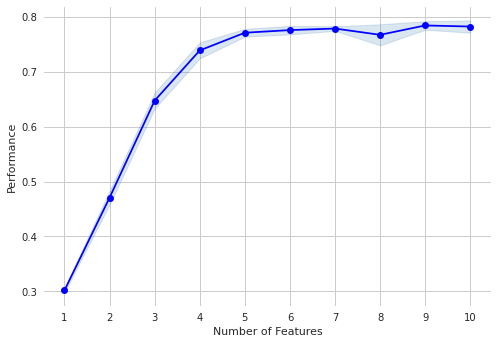

In [97]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
# Plot the Sequential Feature Selection results

fig = plot_sfs(sfs1.get_metric_dict(), kind='std_err')

In [98]:
df.columns

Index(['state', 'account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn', 'area_code_is_408', 'area_code_is_415', 'area_code_is_510',
       'international_plan_is_yes', 'voice_mail_plan_is_yes'],
      dtype='object')

In [100]:
df_subsets = df[['state',
 'total day minutes',
 'total day charge',
 'total eve calls',
 'total eve charge',
 'total night charge',
 'total intl calls',
 'customer service calls',
 'area_code_is_415',
 'voice_mail_plan_is_yes','churn']]

In [101]:
X_reduced = df_subsets.drop(['churn'],axis=1)
y_reduced = df_subsets['churn']

# Split the reduced dataset into training and testing sets
X_train_sfs,X_test_sfs,y_train_sfs,y_test_sfs = train_test_split(X_reduced,y_reduced,test_size=0.25,random_state=123)

In [102]:
rf_model_SFS_Applied = RandomForestClassifier(criterion='entropy', max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, n_estimators=1000)
# Fitting the data into the algorithm
rf_model_SFS_Applied.fit(X_train_sfs,y_train_sfs)
# Getting the predictions
y_pred_rf_sfs = rf_model_SFS_Applied.predict(X_test_sfs) 

**************** SFS APPLIED RANDOM FOREST MODEL RESULTS **************** 
Accuracy score for testing set:  0.96084
F1 score for testing set:  0.74545
Recall score for testing set:  0.60294
Precision score for testing set:  0.97619


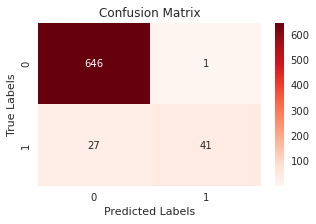

In [103]:
print("**************** SFS APPLIED RANDOM FOREST MODEL RESULTS **************** ")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_rf_sfs),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_rf_sfs),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_rf_sfs),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_rf_sfs),5))
cm_rf_sfs = confusion_matrix(y_test, y_pred_rf_sfs)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_rf_sfs, annot=True, cmap='Reds', fmt='g', ax=ax);
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

Accuracy score: The model achieved an accuracy of 96.08%, indicating that it correctly predicted the class labels for a significant portion of the testing set.

F1 score: The F1 score, which is a measure of the model's balance between precision and recall, is 0.74545. This suggests that the model has a good balance between identifying true positive cases (precision) and capturing all positive cases (recall).

Recall score: The recall score, also known as sensitivity, is 0.60294. It indicates the proportion of actual positive cases that the model correctly identified. A higher recall score suggests that the model is effective at identifying positive cases.

Precision score: The precision score is 0.97619, indicating a high proportion of correctly predicted positive cases out of all predicted positive cases. This suggests that the model has a low rate of false positives.



**Top 10 features by importance**

The top 10 traits, ranked by relevance, are displayed in a horizontal bar plot. The features are arranged with the most significant feature at the top and in descending order.

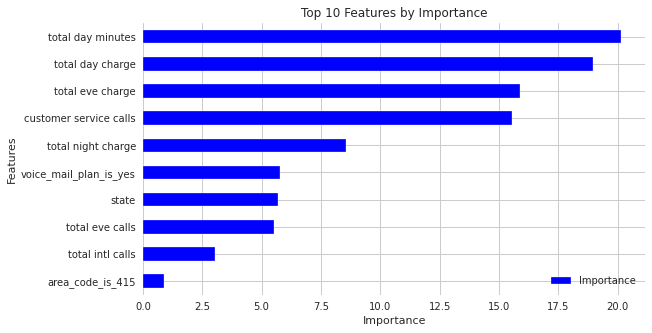

In [125]:
feature_importances = rf_model_SFS_Applied.feature_importances_
Importance = pd.DataFrame({"Importance": feature_importances * 100}, index=X_train_sfs.columns)
Importance = Importance.sort_values(by="Importance", ascending=True)

# Plotting the top 10 features based on their importance levels
top_10_features = Importance.head(10)
top_10_features.plot(kind="barh", color="b", figsize=(9, 5))

plt.title("Top 10 Features by Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


In [126]:
feature_importances = rf_model_SFS_Applied.feature_importances_
importance = pd.DataFrame({"Feature": X_train_sfs.columns, "Importance": feature_importances})
top_10_features = importance.nlargest(10, "Importance").sort_values(by="Importance", ascending=False)

print(top_10_features)


                  Feature  Importance
1       total day minutes    0.201623
2        total day charge    0.189861
4        total eve charge    0.158703
7  customer service calls    0.155617
5      total night charge    0.085576
9  voice_mail_plan_is_yes    0.057685
0                   state    0.056904
3         total eve calls    0.055144
6        total intl calls    0.030256
8        area_code_is_415    0.008632


# Reccomendations

To effectively reduce the financial loss caused by customers who don't stick around, it is crucial to focus on these key features and develop targeted strategies:

1. **Total day minutes and total day charge:** These two features have the highest importance in predicting churn. Customers who have high usage and incur high charges during daytime are more likely to churn. To reduce the financial loss, focus on retaining these high-value customers by offering tailored plans or promotions that provide cost-effective options for their usage patterns.

2. **Total eve charge:** Customers who have higher charges during evening hours also contribute to the financial loss. It is essential to analyze the factors behind these charges and identify any issues or dissatisfactions that may be driving customers away. Addressing these concerns can help in retaining customers and minimizing the financial impact.

3. **Customer service calls:** Customers who frequently reach out to customer service are more prone to churn. These calls may indicate dissatisfaction or unresolved issues. By improving customer service processes, enhancing issue resolution, and providing proactive support, you can reduce the number of customer service calls and increase customer retention.

4. **Total night charge:** Customers who have significant charges during nighttime may also be at risk of churn. Ensure that the services provided during this period are aligned with customer expectations and offer value for money. By addressing any concerns related to nighttime charges, you can retain customers and minimize financial losses
5. **State, total eve calls, total intl calls, and area_code_is_415:** Although these features have lower importance, they can still provide valuable insights. Explore any specific patterns or trends related to these factors within different customer segments or geographical regions.

By understanding customer behavior, providing personalized offerings, and enhancing customer experience, Syriatel Com can improve customer retention, mitigate financial losses, and optimize revenue generation.






# Conclusion


Based on the analysis of churn in Syriatel Com, the following conclusions can be drawn:

The top 10 features with the highest importance in predicting churn are:

Total day minutes

Total day charge

Total eve charge

Customer service calls

Total night charge

Voice mail plan (yes/no)

State

Total eve calls

Total intl calls

Area code (415 or other)

Customers who churn tend to have higher usage during the day and evening, as indicated by the higher values for total day minutes, total day charge, total eve charge, and total eve calls.

The number of customer service calls is an important indicator of churn, suggesting that customer dissatisfaction or issues may contribute to higher churn rates.

Offering a voice mail plan may have a positive impact on reducing churn, as customers with a voice mail plan are less likely to churn.

Geographic location (state) and area code (415 or other) also show some level of influence on churn rates, highlighting the potential impact of regional factors.